<a href="https://colab.research.google.com/github/DANIEL-BONFIM/Arvore-ML/blob/main/FA084_1s2021_Aula05_vALUNO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn

*   Biblioteca de 'Aprendizado de Máquina' (*'Machine Learning'*) para Python.
*   A estrutura do Scikit-Learn é por meio vários componentes, a partir dos quais se importam as bibliotecas relevantes àquele componente.




In [ ]:
# Importação de TODAS as bibliotecas que serão utilizadas

# Gerais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scikit-Learn

# Conjunto Treino/Teste
from sklearn.model_selection import train_test_split

# Normalização (MinMax e Z-Score)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Técnica (KNN para Classificação)
from sklearn.neighbors import KNeighborsClassifier

# Técnica (Árvore de Decisão para Classificação)
from sklearn.tree import DecisionTreeClassifier

# Otimização dos hiperparâmetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Métricas para Classificação - Matriz de Confusão, Relatório Geral, Acurácia, Precisão, Recall e F1-Score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Importar 'DummyClassifier' do componente 'dummy' do sklearn
from sklearn.dummy import DummyClassifier
# Para visualização da Árvore
from sklearn.tree import plot_tree

# Dataset **'Qualidade de Vinho Tinto'** (o mesmo da Aula 3) - Problema de CLASSIFICAÇÃO

(Versão editada do conjunto original do Kaggle)

Fonte: Kaggle  
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009


Fazer download neste link: http://bit.ly/AnaliseDados-QualidadeVinhoDataset

### Consideraremos as notas 'quality' com as seguintes representações:

* Vinhos com notas superiores a 5 são bons: Notas 6, 7 e 8
* Vinhos com notas iguais ou inferiores a 5 são ruins: Notas 3, 4 e 5

### Atribuiremos Classe 1 para vinhos bons e Classe 0 para vinhos ruins


* Usaremos KNN e Árvore de Decisão
* Construiremos uma Tabela (DataFrame) com os Resultados, que nos permitirá comparar os resultados obtidos com as duas técnicas

In [ ]:
# Leitura do conjunto de dados
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Criar atributo 'good_quality', no qual '1' é bom (quality 6 ou maior) e '0' é ruim (quality 5 ou menor)
# Utilizar formato compacto 'list comprehension'
df['good_quality']= [1 if x>5 else 0 for x in df.quality]


In [ ]:
# Separar atributos preditores(X) do atributo meta (y)
y = df.good_quality
X = df.drop(['good_quality', 'quality'], axis=1)


In [ ]:
# Primeiras linhas dos atributos preditores
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: good_quality, Length: 1599, dtype: int64

In [ ]:
# Dividir Conjunto de dados em Treino/Test na proporção 70/30 (random_state = 2021)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2021, stratify=y)

In [ ]:
# VERIFICAR DISTRIBUIÇÃO do atributo meta
print(y.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1    0.534709
0    0.465291
Name: good_quality, dtype: float64
1    0.534406
0    0.465594
Name: good_quality, dtype: float64
1    0.535417
0    0.464583
Name: good_quality, dtype: float64


## Calcular o 'Dummy' para ter como base de comparação com os outros modelos

* Iremos calcular 'Dummy' para TRÊS modelos:  
  (1) SEM normalizar  
  (2) Normalizando Min-Max e  
  (3) Normalizando Z-Score


## KNN

* Iremos criar TRÊS modelos:  
  (1) SEM normalizar  
  (2) Normalizando Min-Max e  
  (3) Normalizando Z-Score

* Em todos os casos, otimizaremos o hiperparâmetro K:  
  (1) GridSearchCV e  
  (2) RandomizedSearchCV

### 'Dummy' e KNN SEM normalizar

In [ ]:
# Criar objeto definindo estratégia para estimativa e ajustar ao conjunto de treino
dummy_SEM = DummyClassifier(strategy='stratified').fit(X_train, y_train)

# Fazer a predição no conjunto de teste utilizando o objeto definido e ajustado anteriormente
y_pred_dummy = dummy_SEM.predict(X_test)

# Construir Matriz de Confusão (DataFrame) para 'Dummy'
MatConf = pd.DataFrame(confusion_matrix(y_test, y_pred_dummy, labels=(0,1)),
                                        index=['obs_0','obs_1'],
                                        columns= ['pred_0','pred_1'])

print(MatConf)

# Apresentar as métricas usando 'classification_report'
print(classification_report(y_test, y_pred_dummy))

# Calcular individualmente os valores de Acurácia, Precisão, Recall e F1-score

# Acurácia (accuracy_score)
acc_dummy_SEM = accuracy_score(y_test, y_pred_dummy)
print('Acurácia: ',acc_dummy_SEM)

# Precisão (precision_score)
prec_dummy_SEM = precision_score(y_test, y_pred_dummy)
print('Precisão: ',prec_dummy_SEM)

# Recall (recall_score)
recall_dummy_SEM = recall_score(y_test, y_pred_dummy)
print('Recall: ',recall_dummy_SEM)

# F1-Score (f1_score)
f1_score_dummy_SEM = f1_score(y_test, y_pred_dummy)
print('F1 Score: ',round(f1_score_dummy_SEM,3))

       pred_0  pred_1
obs_0     110     113
obs_1     118     139
              precision    recall  f1-score   support

           0       0.48      0.49      0.49       223
           1       0.55      0.54      0.55       257

    accuracy                           0.52       480
   macro avg       0.52      0.52      0.52       480
weighted avg       0.52      0.52      0.52       480

Acurácia:  0.51875
Precisão:  0.5515873015873016
Recall:  0.5408560311284046
F1 Score:  0.546


In [ ]:
# Checar distribuição de valores em y_test
y_test.value_counts(normalize=True)

1    0.535417
0    0.464583
Name: good_quality, dtype: float64

#### Otimizar Hiperparâmetro K utilizando GridSearchCV

In [ ]:
# Cronometrar o tempo de execução
%%time

# Passo 1: Definir a faixa do grid em que o hiperparâmetro vai variar
# IMPORTANTE: Formato de 'dictionary' {'label':valor}
faixa_K = {'n_neighbors':np.arange(1,20)}

# Passo 2: Definir o objeto com a técnica e os parâmetros da otimização
knn_gsearch_SEM = GridSearchCV(KNeighborsClassifier(),
                               param_grid=faixa_K,
                               cv=5)

# Passo 3: Otimizar o objeto definido anteriormente no conjunto de dados
knn_gsearch_SEM.fit(X_train, y_train)

# Passo 4: Apresentar o melhor K (K quando se obteve o melhor resultado)
opt_K = knn_gsearch_SEM.best_params_
print(opt_K)


{'n_neighbors': 1}
CPU times: user 1.19 s, sys: 16 ms, total: 1.21 s
Wall time: 1.2 s


In [ ]:
# Conhecer alguns outros componentes do objeto knn_gsearch_SEM
knn_gsearch_SEM.cv_results_

{'mean_fit_time': array([0.00341034, 0.0027133 , 0.00315356, 0.00267534, 0.00266414,
        0.00318894, 0.00269508, 0.00277743, 0.00270262, 0.00266557,
        0.00265827, 0.00273137, 0.00279531, 0.00393834, 0.00287213,
        0.00282235, 0.00343542, 0.00274806, 0.00342126]),
 'mean_score_time': array([0.0080452 , 0.00785222, 0.00955787, 0.00804338, 0.00806546,
        0.00899811, 0.00820642, 0.00821729, 0.00821481, 0.00878391,
        0.00869122, 0.00844674, 0.0085247 , 0.01169748, 0.01143641,
        0.0096117 , 0.01040311, 0.00879755, 0.01094651]),
 'mean_test_score': array([0.66134289, 0.60948511, 0.62826714, 0.62025144, 0.61756086,
        0.61755285, 0.62113229, 0.63006486, 0.64169202, 0.63898943,
        0.64793802, 0.64705317, 0.65508488, 0.65150945, 0.65060858,
        0.64704917, 0.65061659, 0.65419202, 0.65595772]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                    17, 18, 19],
              mask=[False, Fal

In [ ]:
# Otimizado o hiperparâmetro
%%time
# Passo 1: Criar um objeto e ajustar o objeto ao Conjunto de Treino, utilizando o hiperparâmetro ótimo
knn_gsearch_SEM = KNeighborsClassifier(n_neighbors=opt_K['n_neighbors']).fit(X_train,y_train)

# Passo 2: Fazer predição do modelo no Conjunto de Teste
y_pred_gsearch_SEM = knn_gsearch_SEM.predict(X_test)

# Passo 3: Avaliar o modelo
# Construir Matriz de Confusão (DataFrame)
MatConf = pd.DataFrame(confusion_matrix(y_test, y_pred_gsearch_SEM, labels=[0,1]),
                       index=['obs 0', 'obs 1'],columns=['pred 0', 'pred 1'])

print(MatConf)

# Apresentar as métricas usando 'classification_report'
print(classification_report(y_test, y_pred_gsearch_SEM))

# Calcular individualmente os valores de Acurácia, Precisão, Recall e F1-score

# Acurácia (accuracy_score)
knn_acc_gsearch_SEM = accuracy_score(y_test, y_pred_gsearch_SEM)
print('Acurácia: ',knn_acc_gsearch_SEM)

# Precisão (precision_score)
knn_prec_gsearch_SEM = precision_score(y_test, y_pred_gsearch_SEM)
print('Precisão: ',knn_prec_gsearch_SEM)

# Recall (recall_score)
knn_recall_gsearch_SEM = recall_score(y_test, y_pred_gsearch_SEM)
print('Recall: ',knn_recall_gsearch_SEM)

# F1-Score (f1_score)
knn_f1_score_gsearch_SEM = f1_score(y_test, y_pred_gsearch_SEM)
print('F1 Score: ',round(knn_f1_score_gsearch_SEM,3))



       pred 0  pred 1
obs 0     148      75
obs 1      58     199
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       223
           1       0.73      0.77      0.75       257

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480

Acurácia:  0.7229166666666667
Precisão:  0.7262773722627737
Recall:  0.77431906614786
F1 Score:  0.75
CPU times: user 34.7 ms, sys: 2.12 ms, total: 36.8 ms
Wall time: 34.7 ms


#### Otimizar Hiperparâmetro K utilizando RandomizedSearchCV

In [ ]:
# Cronometrar o tempo de execução
%%time

# Passo 1: Definir a faixa do grid em que o hiperparâmetro vai variar
# IMPORTANTE: Formato de 'dictionary' {'label':valor}
faixa_K = {'n_neighbors':np.arange(1,20)}
niter = 10

# Passo 2: Definir o objeto com a técnica e os parâmetros da otimização
knn_rsearch_SEM = RandomizedSearchCV(KNeighborsClassifier(),
                                     param_distributions=faixa_K,
                                     n_iter = niter,
                                     cv=5,
                                     random_state = 2021)

# Passo 3: Otimizar o objeto definido anteriormente no conjunto de dados
knn_rsearch_SEM.fit(X_train, y_train)


# Passo 4: Apresentar o melhor K (K quando se obteve o melhor resultado)
opt_K = knn_rsearch_SEM.best_params_
print(opt_K)


{'n_neighbors': 19}
CPU times: user 612 ms, sys: 329 µs, total: 612 ms
Wall time: 612 ms


In [ ]:
# Otimizado o hiperparâmetro
%%time
# Passo 1: Criar um objeto e ajustar o objeto ao Conjunto de Treino, utilizando o hiperparâmetro ótimo
knn_rsearch_SEM = KNeighborsClassifier(n_neighbors=opt_K['n_neighbors']).fit(X_train, y_train)

# Passo 2: Fazer predição do modelo no Conjunto de Teste
y_pred_rsearch_SEM = knn_rsearch_SEM.predict(X_test)

# Passo 3: Avaliar o modelo
# Construir Matriz de Confusão (DataFrame)
MatConf = pd.DataFrame(confusion_matrix(y_test, y_pred_rsearch_SEM, labels=[0,1]),
                       index=['obs 0', 'obs 1'],columns=['pred 0', 'pred 1'])

print(MatConf)

# Apresentar as métricas usando 'classification_report'
print(classification_report(y_test, y_pred_rsearch_SEM))

# Calcular individualmente os valores de Acurácia, Precisão, Recall e F1-score

# Acurácia (accuracy_score)
knn_acc_rsearch_SEM = accuracy_score(y_test, y_pred_rsearch_SEM)
print('Acurácia: ',knn_acc_rsearch_SEM)

# Precisão (precision_score)
knn_prec_rsearch_SEM = precision_score(y_test, y_pred_rsearch_SEM)
print('Precisão: ',knn_prec_rsearch_SEM)

# Recall (recall_score)
knn_recall_rsearch_SEM = recall_score(y_test, y_pred_rsearch_SEM)
print('Recall: ',knn_recall_rsearch_SEM)

# F1-Score (f1_score)
knn_f1_score_rsearch_SEM = f1_score(y_test, y_pred_rsearch_SEM)
print('F1 Score: ',round(knn_f1_score_rsearch_SEM,3))



       pred 0  pred 1
obs 0     145      78
obs 1      78     179
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       223
           1       0.70      0.70      0.70       257

    accuracy                           0.68       480
   macro avg       0.67      0.67      0.67       480
weighted avg       0.68      0.68      0.68       480

Acurácia:  0.675
Precisão:  0.6964980544747081
Recall:  0.6964980544747081
F1 Score:  0.696
CPU times: user 33.8 ms, sys: 813 µs, total: 34.6 ms
Wall time: 34.7 ms


### 'Dummy' e KNN COM normalização MIN-MAX

In [ ]:
# Normalizar Min-Max (Entre 0 e 1). Usar sklearn.preprocessing MinMaxScaler
# Fazer a normalização no conjunto de treino (X_train) e usar a mesma 'transformação' no conjunto de teste (X_teste)
# Passo 1: Definir o 'scaler' no X_train
scaler = MinMaxScaler().fit(X_train)
X_train_norm = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
# Passo 2: Usar no X_test a mesma operação feita para a normalização de X_train
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
# Criar objeto definindo estratégia para estimativa e ajustar ao conjunto de treino
dummy_MinMax = DummyClassifier(strategy='most_frequent').fit(X_train_norm,y_train)

# Fazer a predição no conjunto de teste utilizando o objeto definido e ajustado anteriormente
y_pred_dummy = dummy_MinMax.predict(X_test_norm)

# Construir Matriz de Confusão (DataFrame) para 'Dummy'
MatConf = pd.DataFrame(confusion_matrix(y_test, y_pred_dummy, labels=[0,1]),
                       index=['obs 0', 'obs 1'],columns=['pred 0', 'pred 1'])

print(MatConf)

# Apresentar as métricas usando 'classification_report'
print(classification_report(y_test, y_pred_dummy))

# Calcular individualmente os valores de Acurácia, Precisão, Recall e F1-score

# Acurácia (accuracy_score)
acc_dummy_MinMax = accuracy_score(y_test, y_pred_dummy)
print('Acurácia: ',acc_dummy_MinMax)

# Precisão (precision_score)
prec_dummy_MinMax = precision_score(y_test, y_pred_dummy)
print('Precisão: ',prec_dummy_MinMax)

# Recall (recall_score)
recall_dummy_MinMax = recall_score(y_test, y_pred_dummy)
print('Recall: ',recall_dummy_MinMax)

# F1-Score (f1_score)
f1_score_dummy_MinMax = f1_score(y_test, y_pred_dummy)
print('F1 Score: ',round(f1_score_dummy_MinMax,3))

#### Otimizar Hiperparâmetro K utilizando GridSearchCV

In [ ]:
# Cronometrar o tempo de execução
%%time

# Passo 1: Definir a faixa do grid em que o hiperparâmetro vai variar
# IMPORTANTE: Formato de 'dictionary' {'label':valor}
faixa_K = {'n_neighbors':np.arange(1,20)}

# Passo 2: Definir o objeto com a técnica e os parâmetros da otimização
knn_gsearch_MinMax = GridSearchCV(KNeighborsClassifier(),
                                  param_grid=faixa_K,
                                  cv=5)

# Passo 3: Otimizar o objeto definido anteriormente no conjunto de dados
knn_gsearch_MinMax.fit(X_train_norm, y_train)


# Passo 4: Apresentar o melhor K (K quando se obteve o melhor resultado)
opt_K = knn_gsearch_MinMax.best_params_
print(opt_K)


{'n_neighbors': 10}
CPU times: user 1.39 s, sys: 389 µs, total: 1.39 s
Wall time: 1.38 s


In [ ]:
# Otimizado o hiperparâmetro
%%time
# Passo 1: Criar um objeto e ajustar o objeto ao Conjunto de Treino, utilizando o hiperparâmetro ótimo
knn_gsearch_MinMax = KNeighborsClassifier(n_neighbors=opt_K['n_neighbors']).fit(X_train_norm, y_train)

# Passo 2: Fazer predição do modelo no Conjunto de Teste
y_pred_gsearch_MinMax = knn_gsearch_MinMax.predict(X_test_norm)

# Passo 3: Avaliar o modelo
# Construir Matriz de Confusão (DataFrame)
MatConf = pd.DataFrame(confusion_matrix(y_test, y_pred_gsearch_MinMax, labels=[0,1]),
                       index=['obs 0', 'obs 1'],columns=['pred 0', 'pred 1'])

print(MatConf)

# Apresentar as métricas usando 'classification_report'
print(classification_report(y_test, y_pred_gsearch_MinMax))

# Calcular individualmente os valores de Acurácia, Precisão, Recall e F1-score

# Acurácia (accuracy_score)
knn_acc_gsearch_MinMax = accuracy_score(y_test, y_pred_gsearch_MinMax)
print('Acurácia: ',knn_acc_gsearch_MinMax)

# Precisão (precision_score)
knn_prec_gsearch_MinMax = precision_score(y_test, y_pred_gsearch_MinMax)
print('Precisão: ',knn_prec_gsearch_MinMax)

# Recall (recall_score)
knn_recall_gsearch_MinMax = recall_score(y_test, y_pred_gsearch_MinMax)
print('Recall: ',knn_recall_gsearch_MinMax)

# F1-Score (f1_score)
knn_f1_score_gsearch_MinMax = f1_score(y_test, y_pred_gsearch_MinMax)
print('F1 Score: ',round(knn_f1_score_gsearch_MinMax,3))



       pred 0  pred 1
obs 0     157      66
obs 1      75     182
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       223
           1       0.73      0.71      0.72       257

    accuracy                           0.71       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.71      0.71      0.71       480

Acurácia:  0.70625
Precisão:  0.7338709677419355
Recall:  0.708171206225681
F1 Score:  0.721
CPU times: user 43.1 ms, sys: 889 µs, total: 43.9 ms
Wall time: 44.2 ms


#### Otimizar Hiperparâmetro K utilizando RandomizedSearchCV

In [ ]:
# Cronometrar o tempo de execução
%%time

# Passo 1: Definir a faixa do grid em que o hiperparâmetro vai variar
# IMPORTANTE: Formato de 'dictionary' {'label':valor}
faixa_K = {'n_neighbors':np.arange(1,20)}
niter = 10

# Passo 2: Definir o objeto com a técnica e os parâmetros da otimização
knn_rsearch_MinMax = RandomizedSearchCV(KNeighborsClassifier(),
                                        param_distributions=faixa_K,
                                        n_iter = niter,
                                        cv=5,
                                        random_state = 2021)

# Passo 3: Otimizar o objeto definido anteriormente no conjunto de dados
knn_rsearch_MinMax.fit(X_train_norm, y_train)


# Passo 4: Apresentar o melhor K (K quando se obteve o melhor resultado)
opt_K = knn_rsearch_MinMax.best_params_
print(opt_K)


{'n_neighbors': 10}
CPU times: user 807 ms, sys: 13.1 ms, total: 820 ms
Wall time: 814 ms


In [ ]:
# Otimizado o hiperparâmetro
%%time
# Passo 1: Criar um objeto e ajustar o objeto ao Conjunto de Treino, utilizando o hiperparâmetro ótimo
knn_rsearch_MinMax = KNeighborsClassifier(n_neighbors=opt_K['n_neighbors']).fit(X_train_norm, y_train)

# Passo 2: Fazer predição do modelo no Conjunto de Teste
y_pred_rsearch_MinMax = knn_rsearch_MinMax.predict(X_test_norm)

# Passo 3: Avaliar o modelo
# Construir Matriz de Confusão (DataFrame)
MatConf = pd.DataFrame(confusion_matrix(y_test, y_pred_rsearch_MinMax, labels=[0,1]),
                       index=['obs 0', 'obs 1'],columns=['pred 0', 'pred 1'])

print(MatConf)

# Apresentar as métricas usando 'classification_report'
print(classification_report(y_test, y_pred_rsearch_MinMax))

# Calcular individualmente os valores de Acurácia, Precisão, Recall e F1-score

# Acurácia (accuracy_score)
knn_acc_rsearch_MinMax = accuracy_score(y_test, y_pred_rsearch_MinMax)
print('Acurácia: ',knn_acc_rsearch_MinMax)

# Precisão (precision_score)
knn_prec_rsearch_MinMax = precision_score(y_test, y_pred_rsearch_MinMax)
print('Precisão: ',knn_prec_rsearch_MinMax)

# Recall (recall_score)
knn_recall_rsearch_MinMax = recall_score(y_test, y_pred_rsearch_MinMax)
print('Recall: ',knn_recall_rsearch_MinMax)

# F1-Score (f1_score)
knn_f1_score_rsearch_MinMax = f1_score(y_test, y_pred_rsearch_MinMax)
print('F1 Score: ',round(knn_f1_score_rsearch_MinMax,3))



### 'Dummy' e KNN COM normalização Z-Score

In [ ]:
# Normalizar Z-Score (Média 0 e Desvio Padrão 1). Usar sklearn.preprocessing StandardScaler
# Fazer a normalização no conjunto de treino (X_train) e usar a mesma 'transformação' no conjunto de teste (X_teste)
# Passo 1: Definir o 'scaler' no X_train
scaler = StandardScaler().fit(X_train)
X_train_norm = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
# Passo 2: Usar no X_test a mesma operação feita para a normalização de X_train
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
# Criar objeto definindo estratégia para estimativa e ajustar ao conjunto de treino
dummy_Z = DummyClassifier(strategy='most_frequent').fit(X_train_norm,y_train)

# Fazer a predição no conjunto de teste utilizando o objeto definido e ajustado anteriormente
y_pred_dummy = dummy_Z.predict(X_test_norm)

# Construir Matriz de Confusão (DataFrame) para 'Dummy'
MatConf = pd.DataFrame(confusion_matrix(y_test, y_pred_dummy, labels=[0,1]),
                       index=['obs 0', 'obs 1'],columns=['pred 0', 'pred 1'])

print(MatConf)

# Apresentar as métricas usando 'classification_report'
print(classification_report(y_test, y_pred_dummy))

# Calcular individualmente os valores de Acurácia, Precisão, Recall e F1-score

# Acurácia (accuracy_score)
acc_dummy_Z = accuracy_score(y_test, y_pred_dummy)
print('Acurácia: ',acc_dummy_Z)

# Precisão (precision_score)
prec_dummy_Z = precision_score(y_test, y_pred_dummy)
print('Precisão: ',prec_dummy_Z)

# Recall (recall_score)
recall_dummy_Z = recall_score(y_test, y_pred_dummy)
print('Recall: ',recall_dummy_Z)

# F1-Score (f1_score)
f1_score_dummy_Z = f1_score(y_test, y_pred_dummy)
print('F1 Score: ',round(f1_score_dummy_Z,3))

       pred 0  pred 1
obs 0       0     223
obs 1       0     257
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       223
           1       0.54      1.00      0.70       257

    accuracy                           0.54       480
   macro avg       0.27      0.50      0.35       480
weighted avg       0.29      0.54      0.37       480

Acurácia:  0.5354166666666667
Precisão:  0.5354166666666667
Recall:  1.0
F1 Score:  0.697


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# OBSERVAÇÃO IMPORTANTE!!! 
# Como pudemos obervar, as métricas para 'Dummy' independem se os dados são normalizados ou não.
# 'Dummy', em problemas de CLASSIFICAÇÃO, está relacionado à distribuição dos valores do atributo meta.
# Portanto, para facilitar, vamos chamar apenas de _dummy
acc_dummy = acc_dummy_Z
prec_dummy = prec_dummy_Z
recall_dummy = recall_dummy_Z
f1_score_dummy = f1_score_dummy_Z

#### Otimizar Hiperparâmetro K utilizando GridSearchCV

In [ ]:
# Cronometrar o tempo de execução
%%time

# Passo 1: Definir a faixa do grid em que o hiperparâmetro vai variar
# IMPORTANTE: Formato de 'dictionary' {'label':valor}
faixa_K = {'n_neighbors':np.arange(1,20)}

# Passo 2: Definir o objeto com a técnica e os parâmetros da otimização
knn_gsearch_Z = GridSearchCV(KNeighborsClassifier(),
                             param_grid=faixa_K,
                             cv=5)

# Passo 3: Otimizar o objeto definido anteriormente no conjunto de dados
knn_gsearch_Z.fit(X_train_norm, y_train)


# Passo 4: Apresentar o melhor K (K quando se obteve o melhor resultado)
opt_K = knn_gsearch_Z.best_params_
print(opt_K)


{'n_neighbors': 14}
CPU times: user 1.43 s, sys: 5.7 ms, total: 1.44 s
Wall time: 1.43 s


In [ ]:
# Otimizado o hiperparâmetro
%%time
# Passo 1: Criar um objeto e ajustar o objeto ao Conjunto de Treino, utilizando o hiperparâmetro ótimo
knn_gsearch_Z = KNeighborsClassifier(n_neighbors=opt_K['n_neighbors']).fit(X_train_norm, y_train)

# Passo 2: Fazer predição do modelo no Conjunto de Teste
y_pred_gsearch_Z = knn_gsearch_Z.predict(X_test_norm)

# Passo 3: Avaliar o modelo
# Construir Matriz de Confusão (DataFrame)
MatConf = pd.DataFrame(confusion_matrix(y_test, y_pred_gsearch_Z, labels=[0,1]),
                       index=['obs 0', 'obs 1'],columns=['pred 0', 'pred 1'])

print(MatConf)

# Apresentar as métricas usando 'classification_report'
print(classification_report(y_test, y_pred_gsearch_Z))

# Calcular individualmente os valores de Acurácia, Precisão, Recall e F1-score

# Acurácia (accuracy_score)
knn_acc_gsearch_Z = accuracy_score(y_test, y_pred_gsearch_Z)
print('Acurácia: ',knn_acc_gsearch_Z)

# Precisão (precision_score)
knn_prec_gsearch_Z = precision_score(y_test, y_pred_gsearch_Z)
print('Precisão: ',knn_prec_gsearch_Z)

# Recall (recall_score)
knn_recall_gsearch_Z = recall_score(y_test, y_pred_gsearch_Z)
print('Recall: ',knn_recall_gsearch_Z)

# F1-Score (f1_score)
knn_f1_score_gsearch_Z = f1_score(y_test, y_pred_gsearch_Z)
print('F1 Score: ',round(knn_f1_score_gsearch_Z,3))



       pred 0  pred 1
obs 0     157      66
obs 1      70     187
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       223
           1       0.74      0.73      0.73       257

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480

Acurácia:  0.7166666666666667
Precisão:  0.7391304347826086
Recall:  0.7276264591439688
F1 Score:  0.733
CPU times: user 41.3 ms, sys: 815 µs, total: 42.1 ms
Wall time: 42.1 ms


#### Otimizar Hiperparâmetro K utilizando RandomizedSearchCV

In [ ]:
# Cronometrar o tempo de execução
%%time

# Passo 1: Definir a faixa do grid em que o hiperparâmetro vai variar
# IMPORTANTE: Formato de 'dictionary' {'label':valor}
faixa_K = {'n_neighbors':np.arange(1,20)}
niter = 10

# Passo 2: Definir o objeto com a técnica e os parâmetros da otimização
knn_rsearch_Z = RandomizedSearchCV(KNeighborsClassifier(),
                                   param_distributions=faixa_K,
                                   n_iter = niter,
                                   cv=5,
                                   random_state = 2021)

# Passo 3: Otimizar o objeto definido anteriormente no conjunto de dados
knn_rsearch_Z.fit(X_train_norm, y_train)


# Passo 4: Apresentar o melhor K (K quando se obteve o melhor resultado)
opt_K = knn_rsearch_Z.best_params_
print(opt_K)


{'n_neighbors': 10}
CPU times: user 750 ms, sys: 902 µs, total: 751 ms
Wall time: 751 ms


In [ ]:
# Otimizado o hiperparâmetro
%%time
# Passo 1: Criar um objeto e ajustar o objeto ao Conjunto de Treino, utilizando o hiperparâmetro ótimo
knn_rsearch_Z = KNeighborsClassifier(n_neighbors=opt_K['n_neighbors']).fit(X_train_norm, y_train)

# Passo 2: Fazer predição do modelo no Conjunto de Teste
y_pred_rsearch_Z = knn_rsearch_Z.predict(X_test_norm)

# Passo 3: Avaliar o modelo
# Construir Matriz de Confusão (DataFrame)
MatConf = pd.DataFrame(confusion_matrix(y_test, y_pred_rsearch_Z, labels=[0,1]),
                       index=['obs 0', 'obs 1'],columns=['pred 0', 'pred 1'])

print(MatConf)

# Apresentar as métricas usando 'classification_report'
print(classification_report(y_test, y_pred_rsearch_Z))

# Calcular individualmente os valores de Acurácia, Precisão, Recall e F1-score

# Acurácia (accuracy_score)
knn_acc_rsearch_Z = accuracy_score(y_test, y_pred_rsearch_Z)
print('Acurácia: ',knn_acc_rsearch_Z)

# Precisão (precision_score)
knn_prec_rsearch_Z = precision_score(y_test, y_pred_rsearch_Z)
print('Precisão: ',knn_prec_rsearch_Z)

# Recall (recall_score)
knn_recall_rsearch_Z = recall_score(y_test, y_pred_rsearch_Z)
print('Recall: ',knn_recall_rsearch_Z)

# F1-Score (f1_score)
knn_f1_score_rsearch_Z = f1_score(y_test, y_pred_rsearch_Z)
print('F1 Score: ',round(knn_f1_score_rsearch_Z,3))



## ÁRVORE DE DECISÃO

* Iremos criar TRÊS modelos:  
  (1) SEM normalizar  
  (2) Normalizando Min-Max e  
  (3) Normalizando Z-Score

* Em todos os casos, otimizaremos os hiperparâmetros : max_depth, min_samples_split e min_samples_leaf  
  (1) GridSearchCV e  
  (2) RandomizedSearchCV

### Árvore de Decisão SEM normalizar

#### Otimizar Hiperparâmetros 'max_depth', 'min_samples_split' e 'min_samples_leaf' utilizando GridSearchCV

In [ ]:
# Cronometrar o tempo de execução
%%time

# Passo 1: Definir a faixa do grid em que os hiperparâmetros vão variar
# IMPORTANTE: Formato de 'dictionary' {'label':valor}
# Inicialmente, vamos construir a faixa nos seguinte valores:
# max_depth: 2 a 7
# min_samples_split: 2 a 11
# min_samples_leaf: 2 a 11

# OBSERVAÇÃO IMPORTANTE!!!
# max_depth (6 valores possíveis), min_samples_split (10 valores possíveis) e min_samples_leaf (10 valores possíveis)
# Total de valores possíveis no Grid: 600
# Considerando que para cada combinação de valores possíveis, o programa roda 5 vezes (cv=5), para esta faixa, o programa vai ser executado 3000 vezes
faixa = {'max_depth':np.arange(2,8),
         'min_samples_split':np.arange(2,11),
         'min_samples_leaf':np.arange(2,11)}

# Passo 2: Definir o objeto com a técnica e os parâmetros da otimização
arv_gsearch_SEM = GridSearchCV(DecisionTreeClassifier(),
                               param_grid=faixa,
                               cv=5)

# Passo 3: Otimizar o objeto definido anteriormente no conjunto de dados
arv_gsearch_SEM.fit(X_train, y_train) 


# Passo 4: Apresentar o melhor K (K quando se obteve o melhor resultado)
opt_hyp = arv_gsearch_SEM.best_params_
print(opt_hyp)


{'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 3}
CPU times: user 18.7 s, sys: 0 ns, total: 18.7 s
Wall time: 19.1 s


In [ ]:
# Otimizado o hiperparâmetro
%%time
# Passo 1: Criar um objeto e ajustar o objeto ao Conjunto de Treino, utilizando o hiperparâmetro ótimo
arv_gsearch_SEM = DecisionTreeClassifier(max_depth=opt_hyp['max_depth'],
                                         min_samples_split=opt_hyp['min_samples_split'],
                                         min_samples_leaf=opt_hyp['min_samples_leaf']).fit(X_train,y_train)

# Passo 2: Fazer predição do modelo no Conjunto de Teste
y_pred_gsearch_SEM = arv_gsearch_SEM.predict(X_test)

# Passo 3: Avaliar o modelo
# Construir Matriz de Confusão (DataFrame)
MatConf = pd.DataFrame(confusion_matrix(y_test, y_pred_gsearch_SEM, labels=[0,1]),
                       index=['obs 0', 'obs 1'],columns=['pred 0', 'pred 1'])

print(MatConf)

# Apresentar as métricas usando 'classification_report'
print(classification_report(y_test, y_pred_gsearch_SEM))

# Calcular individualmente os valores de Acurácia, Precisão, Recall e F1-score

# Acurácia (accuracy_score)
arv_acc_gsearch_SEM = accuracy_score(y_test, y_pred_gsearch_SEM)
print('Acurácia: ',arv_acc_gsearch_SEM)

# Precisão (precision_score)
arv_prec_gsearch_SEM = precision_score(y_test, y_pred_gsearch_SEM)
print('Precisão: ',arv_prec_gsearch_SEM)

# Recall (recall_score)
arv_recall_gsearch_SEM = recall_score(y_test, y_pred_gsearch_SEM)
print('Recall: ',arv_recall_gsearch_SEM)

# F1-Score (f1_score)
arv_f1_score_gsearch_SEM = f1_score(y_test, y_pred_gsearch_SEM)
print('F1 Score: ',round(arv_f1_score_gsearch_SEM,3))



       pred 0  pred 1
obs 0     146      77
obs 1      59     198
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       223
           1       0.72      0.77      0.74       257

    accuracy                           0.72       480
   macro avg       0.72      0.71      0.71       480
weighted avg       0.72      0.72      0.72       480

Acurácia:  0.7166666666666667
Precisão:  0.72
Recall:  0.7704280155642024
F1 Score:  0.744
CPU times: user 36.7 ms, sys: 0 ns, total: 36.7 ms
Wall time: 65.2 ms


#### Otimizar Hiperparâmetros 'max_depth', 'min_samples_split' e 'min_samples_leaf' utilizando RandomizedSearchCV

In [ ]:
# Cronometrar o tempo de execução
%%time

# Passo 1: Definir a faixa do grid em que os hiperparâmetros vão variar
# IMPORTANTE: Formato de 'dictionary' {'label':valor}
# Inicialmente, vamos construir a faixa nos seguinte valores:
# max_depth: 2 a 16
# min_samples_split: 2 a 20, variando de 2 em 2
# min_samples_leaf: 2 a 20, variando de 2 em 2

# OBSERVAÇÃO IMPORTANTE!!!
# max_depth (15 valores possíveis), min_samples_split (10 valores possíveis) e min_samples_leaf (10 valores possíveis)
# Total de valores possíveis no Grid: 1500
# Escolheremos número de iterações em cerca de 25% a 40% do número total de valores possíveis
faixa = {'max_depth':np.arange(2,17),
         'min_samples_split':np.arange(2,21,2),
         'min_samples_leaf':np.arange(2,21,2)}

niter = 450

# Passo 2: Definir o objeto com a técnica e os parâmetros da otimização
arv_rsearch_SEM = RandomizedSearchCV(DecisionTreeClassifier(),
                                     param_distributions=faixa,
                                     n_iter=niter,
                                     cv=5,
                                     random_state=2021)

# Passo 3: Otimizar o objeto definido anteriormente no conjunto de dados
arv_rsearch_SEM.fit(X_train, y_train)


# Passo 4: Apresentar o melhor K (K quando se obteve o melhor resultado)
opt_hyp = arv_rsearch_SEM.best_params_
print(opt_hyp)


{'min_samples_split': 2, 'min_samples_leaf': 6, 'max_depth': 5}
CPU times: user 17.6 s, sys: 1.96 ms, total: 17.6 s
Wall time: 18.1 s


In [ ]:
# Otimizado o hiperparâmetro
%%time
# Passo 1: Criar um objeto e ajustar o objeto ao Conjunto de Treino, utilizando o hiperparâmetro ótimo
arv_rsearch_SEM = DecisionTreeClassifier(max_depth=opt_hyp['max_depth'],
                                         min_samples_split=opt_hyp['min_samples_split'],
                                         min_samples_leaf=opt_hyp['min_samples_leaf']).fit(X_train, y_train)

# Passo 2: Fazer predição do modelo no Conjunto de Teste
y_pred_rsearch_SEM = arv_rsearch_SEM.predict(X_test)

# Passo 3: Avaliar o modelo
# Construir Matriz de Confusão (DataFrame)
MatConf = pd.DataFrame(confusion_matrix(y_test, y_pred_rsearch_SEM, labels=[0,1]),
                       index=['obs 0', 'obs 1'],columns=['pred 0', 'pred 1'])

print(MatConf)

# Apresentar as métricas usando 'classification_report'
print(classification_report(y_test, y_pred_rsearch_SEM))

# Calcular individualmente os valores de Acurácia, Precisão, Recall e F1-score

# Acurácia (accuracy_score)
arv_acc_rsearch_SEM = accuracy_score(y_test, y_pred_rsearch_SEM)
print('Acurácia: ',arv_acc_rsearch_SEM)

# Precisão (precision_score)
arv_prec_rsearch_SEM = precision_score(y_test, y_pred_rsearch_SEM)
print('Precisão: ',arv_prec_rsearch_SEM)

# Recall (recall_score)
arv_recall_rsearch_SEM = recall_score(y_test, y_pred_rsearch_SEM)
print('Recall: ',arv_recall_rsearch_SEM)

# F1-Score (f1_score)
arv_f1_score_rsearch_SEM = f1_score(y_test, y_pred_rsearch_SEM)
print('F1 Score: ',round(arv_f1_score_rsearch_SEM,3))



       pred 0  pred 1
obs 0     146      77
obs 1      59     198
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       223
           1       0.72      0.77      0.74       257

    accuracy                           0.72       480
   macro avg       0.72      0.71      0.71       480
weighted avg       0.72      0.72      0.72       480

Acurácia:  0.7166666666666667
Precisão:  0.72
Recall:  0.7704280155642024
F1 Score:  0.744
CPU times: user 21 ms, sys: 0 ns, total: 21 ms
Wall time: 21.1 ms


### Árvore de Decisão COM normalização MIN-MAX

#### Otimizar Hiperparâmetros 'max_depth', 'min_samples_split' e 'min_samples_leaf' utilizando GridSearchCV

In [ ]:
# Cronometrar o tempo de execução
%%time

# Passo 1: Definir a faixa do grid em que o hiperparâmetro vai variar
# IMPORTANTE: Formato de 'dictionary' {'label':valor}
# Inicialmente, vamos construir a faixa nos seguinte valores:
# max_depth: 2 a 7
# min_samples_split: 2 a 11
# min_samples_leaf: 2 a 11

# OBSERVAÇÃO IMPORTANTE!!!
# max_depth (6 valores possíveis), min_samples_split (10 valores possíveis) e min_samples_leaf (10 valores possíveis)
# Total de valores possíveis no Grid: 600
# Considerando que para cada combinação de valores possíveis, o programa roda 5 vezes (cv=5), para esta faixa, o programa vai ser executado 3000 vezes
faixa = {'max_depth':np.arange(2,8),
         'min_samples_split':np.arange(2,12),
         'min_samples_leaf':np.arange(2,12)}

# Passo 2: Definir o objeto com a técnica e os parâmetros da otimização
arv_gsearch_MinMax = GridSearchCV(DecisionTreeClassifier(),
                                  param_grid=faixa,
                                  cv=5)

# Passo 3: Otimizar o objeto definido anteriormente no conjunto de dados
arv_gsearch_MinMax.fit(X_train_norm, y_train)


# Passo 4: Apresentar o melhor K (K quando se obteve o melhor resultado)
opt_hyp = arv_gsearch_MinMax.best_params_
print(opt_hyp)


{'max_depth': 5, 'min_samples_leaf': 11, 'min_samples_split': 2}
CPU times: user 19.6 s, sys: 7.55 ms, total: 19.6 s
Wall time: 19.6 s


In [ ]:
# Otimizado o hiperparâmetro
%%time
# Passo 1: Criar um objeto e ajustar o objeto ao Conjunto de Treino, utilizando o hiperparâmetro ótimo
arv_gsearch_MinMax = DecisionTreeClassifier(max_depth=opt_hyp['max_depth'],
                                            min_samples_split=opt_hyp['min_samples_split'],
                                            min_samples_leaf=opt_hyp['min_samples_leaf']).fit(X_train_norm, y_train)

# Passo 2: Fazer predição do modelo no Conjunto de Teste
y_pred_gsearch_MinMax = arv_gsearch_MinMax.predict(X_test_norm)

# Passo 3: Avaliar o modelo
# Construir Matriz de Confusão (DataFrame)
MatConf = pd.DataFrame(confusion_matrix(y_test, y_pred_gsearch_MinMax, labels=[0,1]),
                       index=['obs 0', 'obs 1'],columns=['pred 0', 'pred 1'])

print(MatConf)

# Apresentar as métricas usando 'classification_report'
print(classification_report(y_test, y_pred_gsearch_MinMax))

# Calcular individualmente os valores de Acurácia, Precisão, Recall e F1-score

# Acurácia (accuracy_score)
arv_acc_gsearch_MinMax = accuracy_score(y_test, y_pred_gsearch_MinMax)
print('Acurácia: ',arv_acc_gsearch_MinMax)

# Precisão (precision_score)
arv_prec_gsearch_MinMax = precision_score(y_test, y_pred_gsearch_MinMax)
print('Precisão: ',arv_prec_gsearch_MinMax)

# Recall (recall_score)
arv_recall_gsearch_MinMax = recall_score(y_test, y_pred_gsearch_MinMax)
print('Recall: ',arv_recall_gsearch_MinMax)

# F1-Score (f1_score)
arv_f1_score_gsearch_MinMax = f1_score(y_test, y_pred_gsearch_MinMax)
print('F1 Score: ',round(arv_f1_score_gsearch_MinMax,3))



       pred 0  pred 1
obs 0     144      79
obs 1      57     200
              precision    recall  f1-score   support

           0       0.72      0.65      0.68       223
           1       0.72      0.78      0.75       257

    accuracy                           0.72       480
   macro avg       0.72      0.71      0.71       480
weighted avg       0.72      0.72      0.72       480

Acurácia:  0.7166666666666667
Precisão:  0.7168458781362007
Recall:  0.7782101167315175
F1 Score:  0.746
CPU times: user 27.7 ms, sys: 1.07 ms, total: 28.8 ms
Wall time: 26.5 ms


#### Otimizar Hiperparâmetros 'max_depth', 'min_samples_split' e 'min_samples_leaf' utilizando RandomizedSearchCV

In [ ]:
# Cronometrar o tempo de execução
%%time

# Passo 1: Definir a faixa do grid em que o hiperparâmetro vai variar
# IMPORTANTE: Formato de 'dictionary' {'label':valor}
# Inicialmente, vamos construir a faixa nos seguinte valores:
# max_depth: 2 a 16
# min_samples_split: 2 a 20, variando de 2 em 2
# min_samples_leaf: 2 a 20, variando de 2 em 2

# OBSERVAÇÃO IMPORTANTE!!!
# max_depth (15 valores possíveis), min_samples_split (10 valores possíveis) e min_samples_leaf (10 valores possíveis)
# Total de valores possíveis no Grid: 1500
# Escolheremos número de iterações em cerca de 25% a 40% do número total de valores possíveis
faixa = {'max_depth':np.arange(2,17),
         'min_samples_split':np.arange(2,21,2),
         'min_samples_leaf':np.arange(2,21,2)}
niter = 450

# Passo 2: Definir o objeto com a técnica e os parâmetros da otimização
arv_rsearch_MinMax = RandomizedSearchCV(DecisionTreeClassifier(),
                                        param_distributions=faixa,
                                        n_iter = niter,
                                        cv=5,
                                        random_state = 2021)

# Passo 3: Otimizar o objeto definido anteriormente no conjunto de dados
arv_rsearch_MinMax.fit(X_train_norm, y_train)


# Passo 4: Apresentar o melhor K (K quando se obteve o melhor resultado)
opt_hyp = arv_rsearch_MinMax.best_params_
print(opt_hyp)


{'min_samples_split': 6, 'min_samples_leaf': 14, 'max_depth': 5}
CPU times: user 16.7 s, sys: 15.7 ms, total: 16.7 s
Wall time: 16.7 s


In [ ]:
# Otimizado o hiperparâmetro
%%time
# Passo 1: Criar um objeto e ajustar o objeto ao Conjunto de Treino, utilizando o hiperparâmetro ótimo
arv_rsearch_MinMax = DecisionTreeClassifier(max_depth=opt_hyp['max_depth'],
                                              min_samples_split=opt_hyp['min_samples_split'],
                                              min_samples_leaf=opt_hyp['min_samples_leaf']).fit(X_train_norm, y_train)

# Passo 2: Fazer predição do modelo no Conjunto de Teste
y_pred_rsearch_MinMax = arv_rsearch_MinMax.predict(X_test_norm)

# Passo 3: Avaliar o modelo
# Construir Matriz de Confusão (DataFrame)
MatConf = pd.DataFrame(confusion_matrix(y_test, y_pred_rsearch_MinMax, labels=[0,1]),
                       index=['obs 0', 'obs 1'],columns=['pred 0', 'pred 1'])

print(MatConf)

# Apresentar as métricas usando 'classification_report'
print(classification_report(y_test, y_pred_rsearch_MinMax))

# Calcular individualmente os valores de Acurácia, Precisão, Recall e F1-score

# Acurácia (accuracy_score)
arv_acc_rsearch_MinMax = accuracy_score(y_test, y_pred_rsearch_MinMax)
print('Acurácia: ',arv_acc_rsearch_MinMax)

# Precisão (precision_score)
arv_prec_rsearch_MinMax = precision_score(y_test, y_pred_rsearch_MinMax)
print('Precisão: ',arv_prec_rsearch_MinMax)

# Recall (recall_score)
arv_recall_rsearch_MinMax = recall_score(y_test, y_pred_rsearch_MinMax)
print('Recall: ',arv_recall_rsearch_MinMax)

# F1-Score (f1_score)
arv_f1_score_rsearch_MinMax = f1_score(y_test, y_pred_rsearch_MinMax)
print('F1 Score: ',round(arv_f1_score_rsearch_MinMax,3))



       pred 0  pred 1
obs 0     144      79
obs 1      57     200
              precision    recall  f1-score   support

           0       0.72      0.65      0.68       223
           1       0.72      0.78      0.75       257

    accuracy                           0.72       480
   macro avg       0.72      0.71      0.71       480
weighted avg       0.72      0.72      0.72       480

Acurácia:  0.7166666666666667
Precisão:  0.7168458781362007
Recall:  0.7782101167315175
F1 Score:  0.746
CPU times: user 20.6 ms, sys: 4.08 ms, total: 24.6 ms
Wall time: 22.8 ms


### Árvore de Decisão COM normalização Z-Score

#### Otimizar Hiperparâmetros 'max_depth', 'min_samples_split' e 'min_samples_leaf' utilizando GridSearchCV

In [ ]:
# Cronometrar o tempo de execução
%%time

# Passo 1: Definir a faixa do grid em que o hiperparâmetro vai variar
# IMPORTANTE: Formato de 'dictionary' {'label':valor}
# Inicialmente, vamos construir a faixa nos seguinte valores:
# max_depth: 2 a 7
# min_samples_split: 2 a 11
# min_samples_leaf: 2 a 11

# OBSERVAÇÃO IMPORTANTE!!!
# max_depth (6 valores possíveis), min_samples_split (10 valores possíveis) e min_samples_leaf (10 valores possíveis)
# Total de valores possíveis no Grid: 600
# Considerando que para cada combinação de valores possíveis, o programa roda 5 vezes (cv=5), para esta faixa, o programa vai ser executado 3000 vezes
faixa = {'max_depth':np.arange(2,8),
         'min_samples_split':np.arange(2,12),
         'min_samples_leaf':np.arange(2,12)}

# Passo 2: Definir o objeto com a técnica e os parâmetros da otimização
arv_gsearch_Z = GridSearchCV(DecisionTreeClassifier(),
                             param_grid=faixa,
                             cv=5)

# Passo 3: Otimizar o objeto definido anteriormente no conjunto de dados
arv_gsearch_Z.fit(X_train_norm, y_train)


# Passo 4: Apresentar o melhor K (K quando se obteve o melhor resultado)
opt_hyp = arv_gsearch_Z.best_params_
print(opt_hyp)


{'max_depth': 5, 'min_samples_leaf': 11, 'min_samples_split': 4}
CPU times: user 19.5 s, sys: 27.8 ms, total: 19.5 s
Wall time: 19.4 s


In [ ]:
# Otimizado o hiperparâmetro
%%time
# Passo 1: Criar um objeto e ajustar o objeto ao Conjunto de Treino, utilizando o hiperparâmetro ótimo
arv_gsearch_Z = DecisionTreeClassifier(max_depth=opt_hyp['max_depth'],
                                       min_samples_split=opt_hyp['min_samples_split'],
                                       min_samples_leaf=opt_hyp['min_samples_leaf']).fit(X_train_norm, y_train)

# Passo 2: Fazer predição do modelo no Conjunto de Teste
y_pred_gsearch_Z = arv_gsearch_Z.predict(X_test_norm)

# Passo 3: Avaliar o modelo
# Construir Matriz de Confusão (DataFrame)
MatConf = pd.DataFrame(confusion_matrix(y_test, y_pred_gsearch_Z, labels=[0,1]),
                       index=['obs 0', 'obs 1'],columns=['pred 0', 'pred 1'])

print(MatConf)

# Apresentar as métricas usando 'classification_report'
print(classification_report(y_test, y_pred_gsearch_Z))

# Calcular individualmente os valores de Acurácia, Precisão, Recall e F1-score

# Acurácia (accuracy_score)
arv_acc_gsearch_Z = accuracy_score(y_test, y_pred_gsearch_Z)
print('Acurácia: ',arv_acc_gsearch_Z)

# Precisão (precision_score)
arv_prec_gsearch_Z = precision_score(y_test, y_pred_gsearch_Z)
print('Precisão: ',arv_prec_gsearch_Z)

# Recall (recall_score)
arv_recall_gsearch_Z = recall_score(y_test, y_pred_gsearch_Z)
print('Recall: ',arv_recall_gsearch_Z)

# F1-Score (f1_score)
arv_f1_score_gsearch_Z = f1_score(y_test, y_pred_gsearch_Z)
print('F1 Score: ',round(arv_f1_score_gsearch_Z,3))



       pred 0  pred 1
obs 0     144      79
obs 1      57     200
              precision    recall  f1-score   support

           0       0.72      0.65      0.68       223
           1       0.72      0.78      0.75       257

    accuracy                           0.72       480
   macro avg       0.72      0.71      0.71       480
weighted avg       0.72      0.72      0.72       480

Acurácia:  0.7166666666666667
Precisão:  0.7168458781362007
Recall:  0.7782101167315175
F1 Score:  0.746
CPU times: user 21.8 ms, sys: 0 ns, total: 21.8 ms
Wall time: 21.2 ms


#### Otimizar Hiperparâmetros 'max_depth', 'min_samples_split' e 'min_samples_leaf' utilizando RandomizedSearchCV

In [ ]:
# Cronometrar o tempo de execução
%%time

# Passo 1: Definir a faixa do grid em que o hiperparâmetro vai variar
# IMPORTANTE: Formato de 'dictionary' {'label':valor}
# Inicialmente, vamos construir a faixa nos seguinte valores:
# max_depth: 2 a 16
# min_samples_split: 2 a 20, variando de 2 em 2
# min_samples_leaf: 2 a 20, variando de 2 em 2

# OBSERVAÇÃO IMPORTANTE!!!
# max_depth (15 valores possíveis), min_samples_split (10 valores possíveis) e min_samples_leaf (10 valores possíveis)
# Total de valores possíveis no Grid: 1500
# Escolheremos número de iterações em cerca de 25% a 40% do número total de valores possíveis
faixa = {'max_depth':np.arange(2,17),
         'min_samples_split':np.arange(2,21,2),
         'min_samples_leaf':np.arange(2,21,2)}
niter = 450

# Passo 2: Definir o objeto com a técnica e os parâmetros da otimização
arv_rsearch_Z = RandomizedSearchCV(DecisionTreeClassifier(),
                                   param_distributions=faixa,
                                   n_iter = niter,
                                   cv=5,
                                   random_state = 2021)

# Passo 3: Otimizar o objeto definido anteriormente no conjunto de dados
arv_rsearch_Z.fit(X_train_norm, y_train)


# Passo 4: Apresentar o melhor K (K quando se obteve o melhor resultado)
opt_hyp = arv_rsearch_Z.best_params_
print(opt_hyp)


{'min_samples_split': 6, 'min_samples_leaf': 14, 'max_depth': 5}
CPU times: user 17 s, sys: 21 ms, total: 17 s
Wall time: 17 s


In [ ]:
# Otimizado o hiperparâmetro
%%time
# Passo 1: Criar um objeto e ajustar o objeto ao Conjunto de Treino, utilizando o hiperparâmetro ótimo
arv_rsearch_Z = DecisionTreeClassifier(criterion='entropy',max_depth=opt_hyp['max_depth'],
                                       min_samples_split=opt_hyp['min_samples_split'],
                                       min_samples_leaf=opt_hyp['min_samples_leaf']).fit(X_train_norm, y_train)

# Passo 2: Fazer predição do modelo no Conjunto de Teste
y_pred_rsearch_Z = arv_rsearch_Z.predict(X_test_norm)

# Passo 3: Avaliar o modelo
# Construir Matriz de Confusão (DataFrame)
MatConf = pd.DataFrame(confusion_matrix(y_test, y_pred_rsearch_Z, labels=[0,1]),
                       index=['obs 0', 'obs 1'],columns=['pred 0', 'pred 1'])

print(MatConf)

# Apresentar as métricas usando 'classification_report'
print(classification_report(y_test, y_pred_rsearch_Z))

# Calcular individualmente os valores de Acurácia, Precisão, Recall e F1-score

# Acurácia (accuracy_score)
arv_acc_rsearch_Z = accuracy_score(y_test, y_pred_rsearch_Z)
print('Acurácia: ',arv_acc_rsearch_Z)

# Precisão (precision_score)
arv_prec_rsearch_Z = precision_score(y_test, y_pred_rsearch_Z)
print('Precisão: ',arv_prec_rsearch_Z)

# Recall (recall_score)
arv_recall_rsearch_Z = recall_score(y_test, y_pred_rsearch_Z)
print('Recall: ',arv_recall_rsearch_Z)

# F1-Score (f1_score)
arv_f1_score_rsearch_Z = f1_score(y_test, y_pred_rsearch_Z)
print('F1 Score: ',round(arv_f1_score_rsearch_Z,3))



       pred 0  pred 1
obs 0     148      75
obs 1      65     192
              precision    recall  f1-score   support

           0       0.69      0.66      0.68       223
           1       0.72      0.75      0.73       257

    accuracy                           0.71       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.71      0.71      0.71       480

Acurácia:  0.7083333333333334
Precisão:  0.7191011235955056
Recall:  0.7470817120622568
F1 Score:  0.733
CPU times: user 35.5 ms, sys: 984 µs, total: 36.4 ms
Wall time: 36.5 ms


### Desenhando um Árvore de Decisão

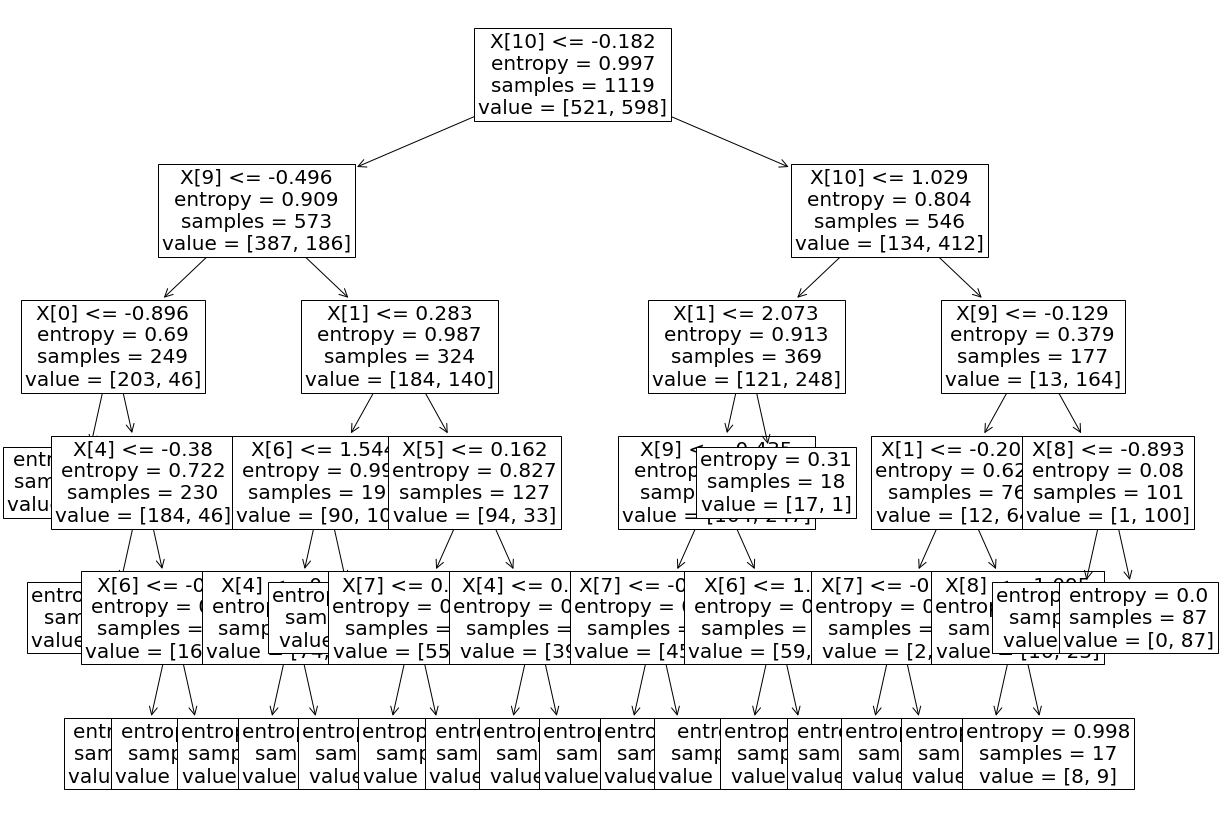

In [ ]:
# Desenhando a Árvore de Decisão
# Desenhar a Árvore de Decisão UM POUCO MAIOR
# Aumentar o tamanho da figura e da fonte
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(arv_rsearch_Z, fontsize=20);

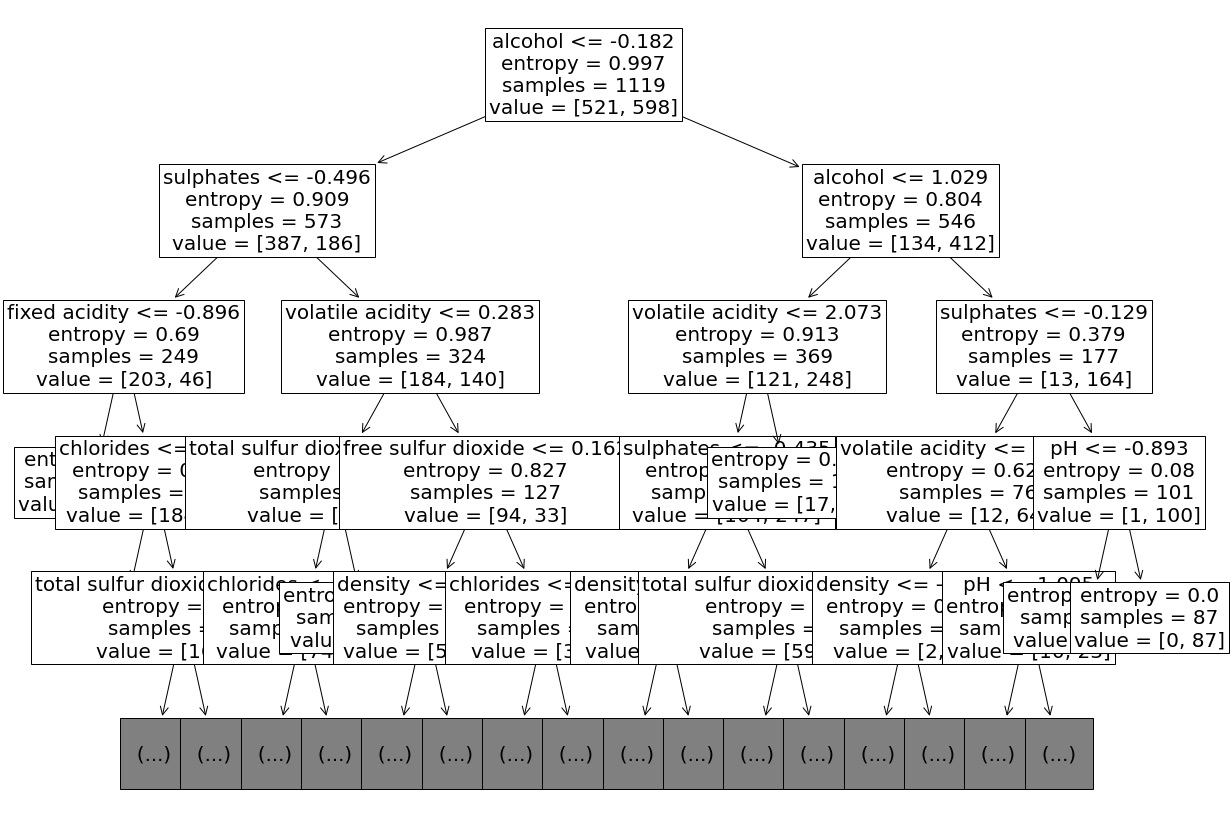

In [ ]:
# Dar nomes aos atributos
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(arv_rsearch_Z,
          fontsize=20, 
          max_depth=4,
          feature_names=X_test.columns);


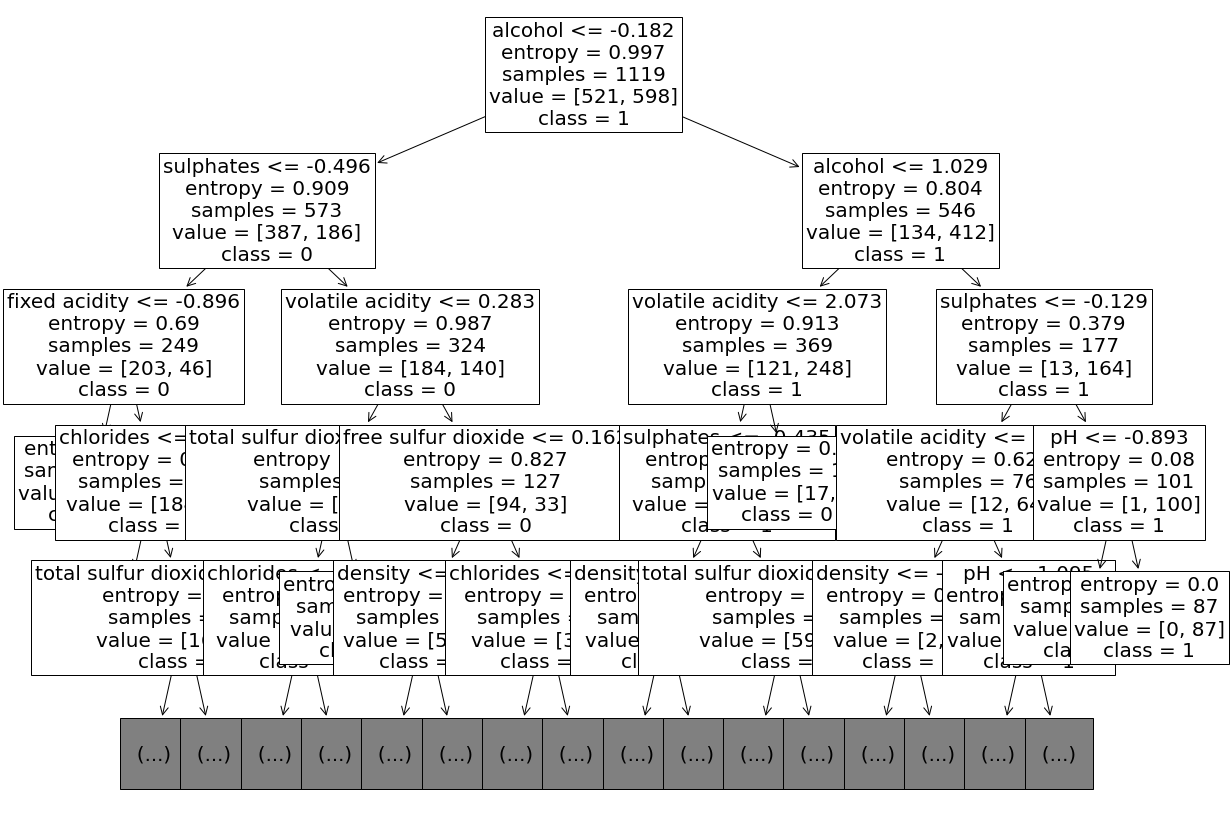

In [ ]:
# Dar nomes às classes

from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(arv_rsearch_Z,
          fontsize=20, 
          max_depth=4,
          feature_names=X_test.columns,
          class_names=['0','1']);

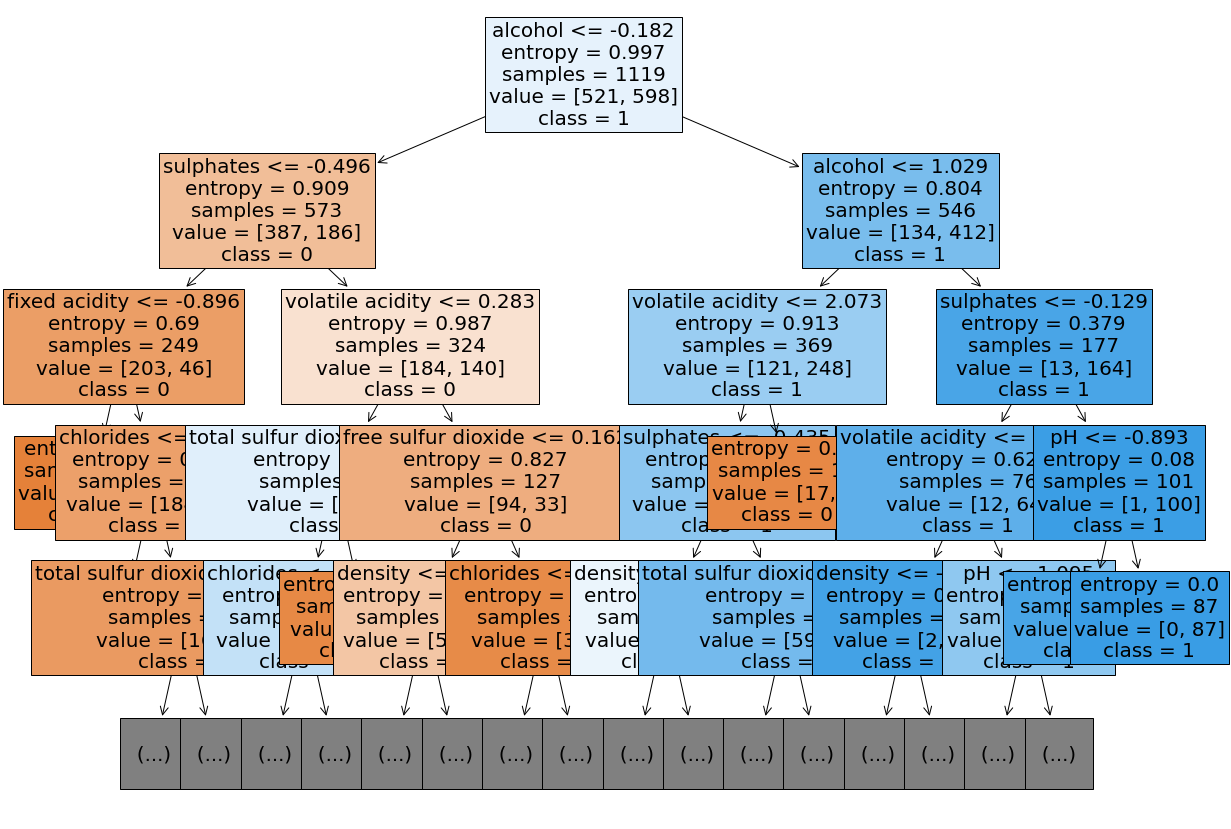

In [ ]:
# Dar cor às classes
plt.figure(figsize=(20,15))
plot_tree(arv_rsearch_Z,
          fontsize=20, 
          max_depth=4,
          feature_names=X_test.columns,
          class_names=['0','1'],
          filled=True);

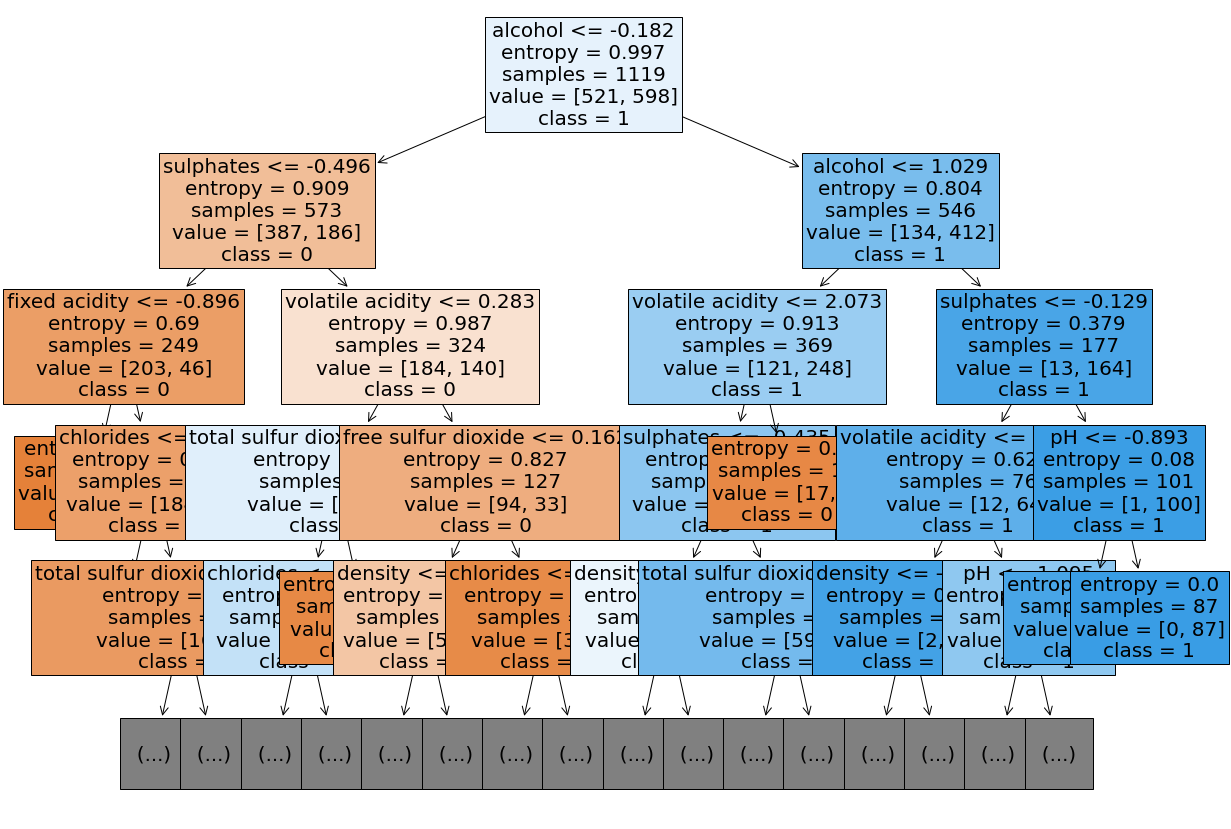

In [ ]:
# Salvar a figura
plt.figure(figsize=(20,15))
plot_tree(arv_rsearch_Z,
          fontsize=20, 
          max_depth=4,
          feature_names=X_test.columns,
          class_names=['0','1'],
          filled=True);
plt.savefig('arvore.png')             

# Comparação dos resultados obtidos com os modelos

## Acurácia

In [ ]:
acc = [acc_dummy, 
       knn_acc_gsearch_SEM, knn_acc_rsearch_SEM, 
       knn_acc_gsearch_MinMax, knn_acc_rsearch_MinMax,
       knn_acc_gsearch_Z, knn_acc_rsearch_Z,
       arv_acc_gsearch_SEM, arv_acc_rsearch_SEM,
       arv_acc_gsearch_MinMax, arv_acc_rsearch_MinMax,
       arv_acc_gsearch_Z, arv_acc_rsearch_Z]

## Precision

In [ ]:
prec = [prec_dummy,
        knn_prec_gsearch_SEM, knn_prec_rsearch_SEM,
        knn_prec_gsearch_MinMax, knn_prec_rsearch_MinMax,
        knn_prec_gsearch_Z, knn_prec_rsearch_Z,
        arv_prec_gsearch_SEM, arv_prec_rsearch_SEM,
        arv_prec_gsearch_MinMax, arv_prec_rsearch_MinMax,
        arv_prec_gsearch_Z, arv_prec_rsearch_Z]

## Recall

In [ ]:
recall = [recall_dummy,
          knn_recall_gsearch_SEM, knn_recall_rsearch_SEM,
          knn_recall_gsearch_MinMax, knn_recall_rsearch_MinMax,
          knn_recall_gsearch_Z, knn_recall_rsearch_Z,
          arv_recall_gsearch_SEM, arv_recall_rsearch_SEM,
          arv_recall_gsearch_MinMax, arv_recall_rsearch_MinMax,
          arv_recall_gsearch_Z, arv_recall_rsearch_Z]

## F1-Score

In [ ]:
f1_score = [f1_score_dummy,
            knn_f1_score_gsearch_SEM, knn_f1_score_rsearch_SEM,
            knn_f1_score_gsearch_MinMax, knn_f1_score_rsearch_MinMax,
            knn_f1_score_gsearch_Z, knn_f1_score_rsearch_Z,
            arv_f1_score_gsearch_SEM, arv_f1_score_rsearch_SEM,
            arv_f1_score_gsearch_MinMax, arv_f1_score_rsearch_MinMax,
            arv_f1_score_gsearch_Z, arv_f1_score_rsearch_Z]

## Construir DataFrame


In [ ]:
df_metricas = pd.DataFrame([acc,prec,recall,f1_score],
                           columns=['Dummy','KNN_GSEM','KNN_RSEM','KNN_GMinMax','KNN_RMinMax','KNN_GZ','KNN_RZ','Arv_GSEM','Arv_RSEM','Arv_GMinMax','Arv_RMinMax','Arv_GZ','Arv_RZ'],
                           index=['Acc','Prec','Recall','F1-Score'])

df_metricas.head()

,Dummy,KNN_GSEM,KNN_RSEM,KNN_GMinMax,KNN_RMinMax,KNN_GZ,KNN_RZ,Arv_GSEM,Arv_RSEM,Arv_GMinMax,Arv_RMinMax,Arv_GZ,Arv_RZ
Acc,0.535417,0.722917,0.675000,0.706250,0.708333,0.716667,0.706250,0.716667,0.716667,0.716667,0.716667,0.716667,0.708333
Prec,0.535417,0.726277,0.696498,0.733871,0.734940,0.739130,0.733871,0.720000,0.720000,0.716846,0.716846,0.716846,0.719101
Recall,1.000000,0.774319,0.696498,0.708171,0.712062,0.727626,0.708171,0.770428,0.770428,0.778210,0.778210,0.778210,0.747082
F1-Score,0.697422,0.749529,0.696498,0.720792,0.723320,0.733333,0.720792,0.744361,0.744361,0.746269,0.746269,0.746269,0.732824


In [ ]:
# Transpor a matriz (Colunas virarem linhas e Linhas virarem colunas)
df_metricas=df_metricas.T
df_metricas.head()

,Acc,Prec,Recall,F1-Score
Dummy,0.535417,0.535417,1.000000,0.697422
KNN_GSEM,0.722917,0.726277,0.774319,0.749529
KNN_RSEM,0.675000,0.696498,0.696498,0.696498
KNN_GMinMax,0.706250,0.733871,0.708171,0.720792
KNN_RMinMax,0.708333,0.734940,0.712062,0.723320


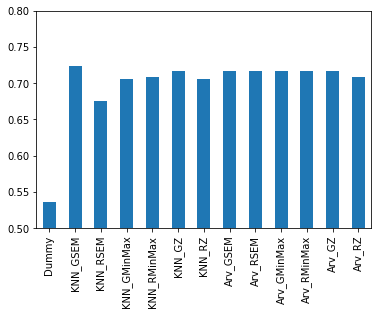

In [ ]:
# Gráfico da Acurácia de todos os modelos
#df_metricas['Acc'].plot(kind="bar", ylim = [0.5,0.8], title='Acurácia', figsize=(12,6));
df_metricas['Acc'].plot.bar(ylim = [0.5,0.8]);

In [ ]:
# Gráfico da Precisão de todos os modelos


In [ ]:
# Gráfico do Recall de todos os modelos


In [ ]:
# Gráfico do F1-Score de todos os modelos
